# Configure your map

The map of the environment can be customized.

## How to pass the map to the environment

In [7]:
"""Preliminary imports and definitions."""

import tempfile
from io import BytesIO
from pathlib import Path
from textwrap import dedent

import PIL
import gym
from IPython.core.display import Image, display

from gym_sapientino.core.constants import DEFAULT_MAP_PATH


def display_img_array(ima):
    """Display an rgb_array."""
    im = PIL.Image.fromarray(ima)
    bio = BytesIO()
    im.save(bio, format="png")
    display(Image(bio.getvalue(), format="png"))


You can use teh `path_to_map` keyword argument
to specify the map to use.

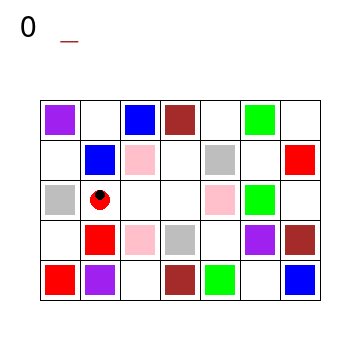

In [8]:
env = gym.make("Sapientino-v0", path_to_map=DEFAULT_MAP_PATH)
array = env.render(mode="rgb_array")
display_img_array(array)

## Map format

The default map is in `gym_sapientino/assets/default_map.txt`.

The code expects the path to point to a text file of ASCII characters.
Each rows of characters correspond to a row of cells in the grid of the environment.

The allowed characters are:

- ` ` (a space), the empty cell;
- `r`, a cell with color red;
- `g`, a cell with color green;
- `b`, a cell with color blue;
- `y`, a cell with color yellow;
- `p`, a cell with color pink;
- `o`, a cell with color orange;
- `B`, a cell with color brown;
- `G`, a cell with color gray;
- `P`, a cell with color purple;

The character `|` will be ignored. It is useful as a separator of rows
during the editing (some text editors might remove trailing spaces of a row).

For example, the default grid map is:
```
|P bB g |
| bp G r|
|G   pg |
| rpG PB|
|rP Bg b|
```

## Example of custom map

An example of custom map:

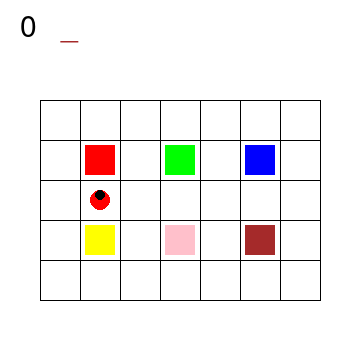

In [10]:
temporary_path = Path(tempfile.mktemp(suffix=".txt"))
temporary_path.write_text(dedent("""\
|       |
| r g b |
|       |
| y p B |
|       |"""))
env = gym.make("Sapientino-v0", path_to_map=temporary_path)
array = env.render(mode="rgb_array")
display_img_array(array)
